In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [3]:
df= pd.read_csv('SolarPrediction.csv')
df

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00
...,...,...,...,...,...,...,...,...,...,...,...
32681,1480587604,12/1/2016 12:00:00 AM,00:20:04,1.22,44,30.43,102,145.42,6.75,06:41:00,17:42:00
32682,1480587301,12/1/2016 12:00:00 AM,00:15:01,1.17,44,30.42,102,117.78,6.75,06:41:00,17:42:00
32683,1480587001,12/1/2016 12:00:00 AM,00:10:01,1.20,44,30.42,102,145.19,9.00,06:41:00,17:42:00
32684,1480586702,12/1/2016 12:00:00 AM,00:05:02,1.23,44,30.42,101,164.19,7.87,06:41:00,17:42:00


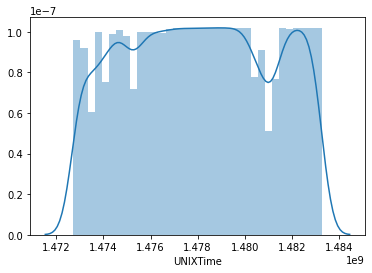

In [4]:
sns.distplot(df['UNIXTime'])

In [5]:
df=df.drop(['Data','Time','TimeSunRise','TimeSunSet'],axis=1)
df

,UNIXTime,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
0,1475229326,1.21,48,30.46,59,177.39,5.62
1,1475229023,1.21,48,30.46,58,176.78,3.37
2,1475228726,1.23,48,30.46,57,158.75,3.37
3,1475228421,1.21,48,30.46,60,137.71,3.37
4,1475228124,1.17,48,30.46,62,104.95,5.62
...,...,...,...,...,...,...,...
32681,1480587604,1.22,44,30.43,102,145.42,6.75
32682,1480587301,1.17,44,30.42,102,117.78,6.75
32683,1480587001,1.20,44,30.42,102,145.19,9.00
32684,1480586702,1.23,44,30.42,101,164.19,7.87


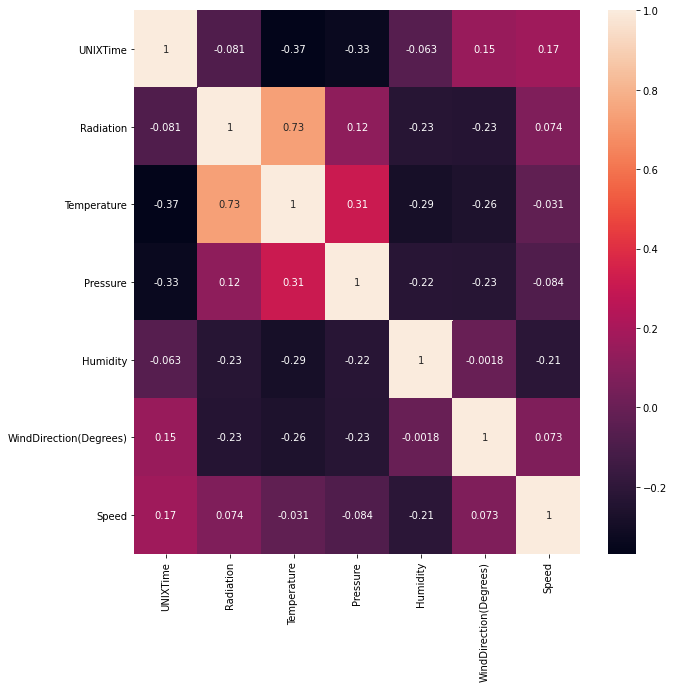

In [6]:
figure= plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

<Figure size 1440x720 with 0 Axes>

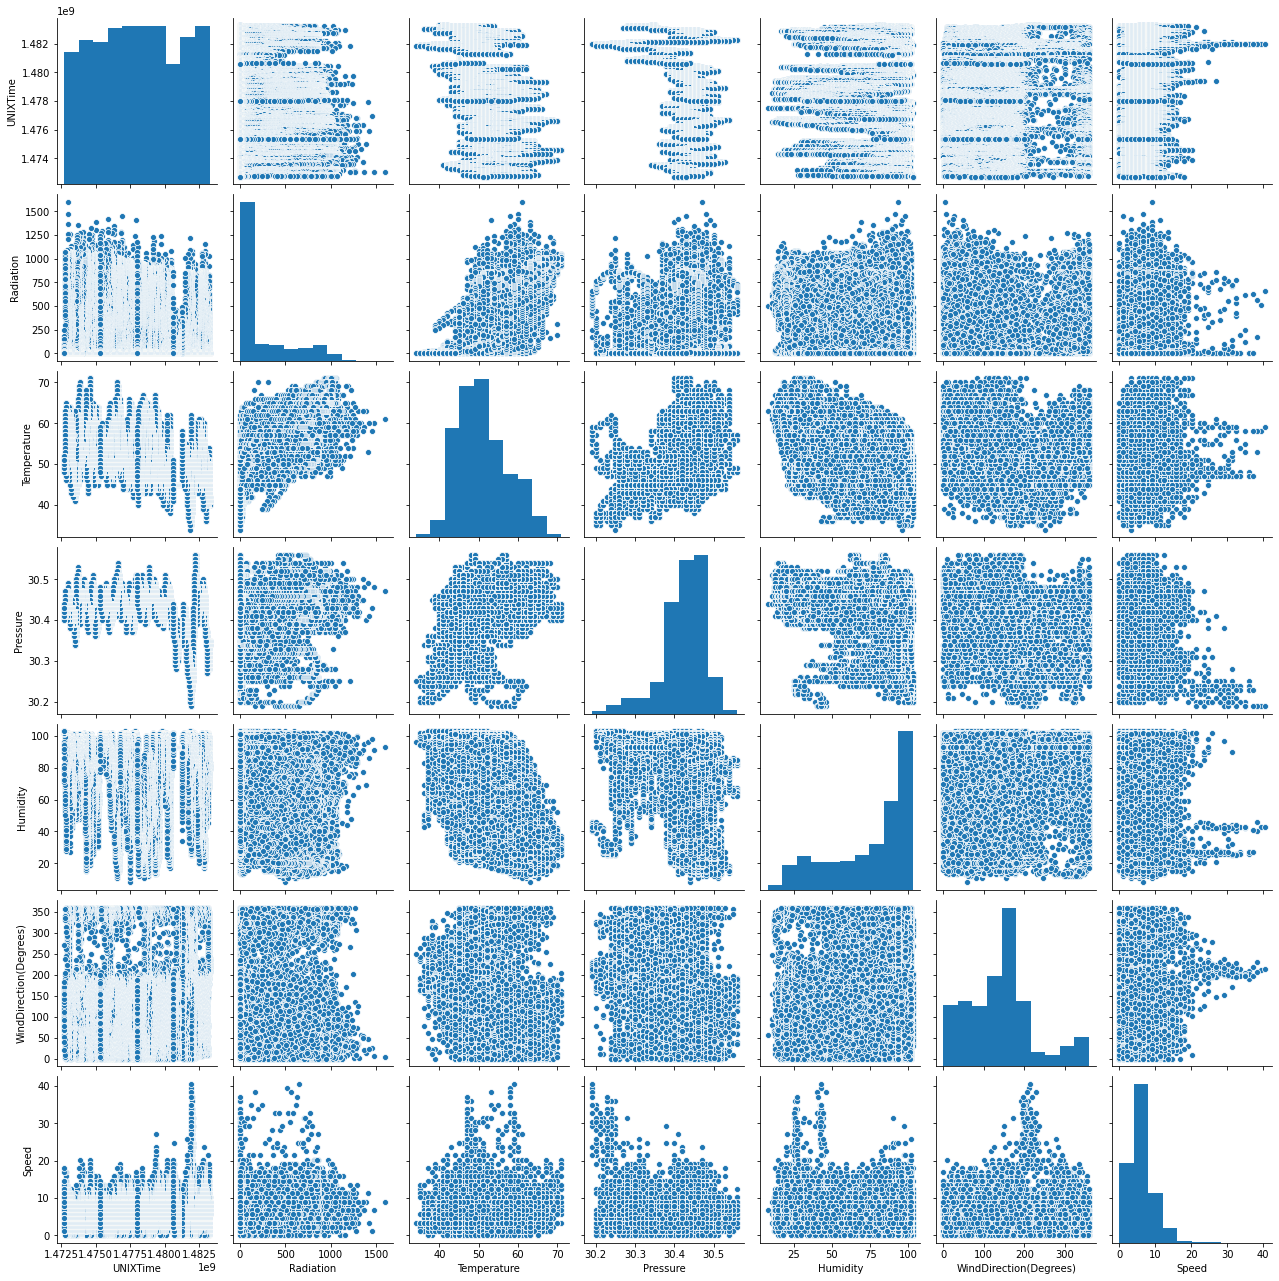

In [7]:
figure= plt.figure(figsize=(20,10))
sns.pairplot(df)

In [8]:
X= df.drop('Radiation',axis=1)
y=df['Radiation']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=101)

In [11]:
ada_reg= AdaBoostRegressor(RandomForestRegressor())
ada_reg.fit(X_train,y_train)


AdaBoostRegressor(base_estimator=RandomForestRegressor())

In [14]:
ada_reg.score(X_test,y_test)


0.9124857347237976

In [21]:
y_pred=ada_reg.predict(X_test)
print(r2_score(y_test, y_pred))

0.9124857347237976
